In [1]:
import pandas as pd
import numpy as np 
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [29]:
#reading the data 
data = pd.read_pickle('data.pickle')

In [31]:
sub1 = data[['age_1st_mar','ETHNICITY']]
sub1.head()

,age_1st_mar,ETHNICITY
0,,hispanich
1,23,hispanich
2,35,hispanich
3,,hispanich
4,22,black



### *`age_1st_mar`  ->>  quantitative

### *`ethnicity`         ->>   categorical 

## the relationship between ethnicity and the age of the first marriage 
#### * H0 → there is no relationship between  ethnicity and the age of the first marriage 
#### * H1 → there is a relationship between  ethnicity and the age of the first marriage 


##### since there is more than two level for our exploratory variable we must use post hoc 
##### will use ``tukey`` for this example  

In [36]:
sub1 = sub1.replace(0,np.NAN).dropna()
sub1['age_1st_mar'] = sub1['age_1st_mar'].convert_objects(convert_numeric=True)
sub1.dtypes

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


age_1st_mar    float64
ETHNICITY       object
dtype: object

In [33]:
means = sub1.groupby(sub1.ETHNICITY).mean()
print(means)

           age_1st_mar
ETHNICITY             
asian        27.510783
black        25.904817
hawaian      24.563218
hispanich    24.003022
indian       23.134467
white        23.973974


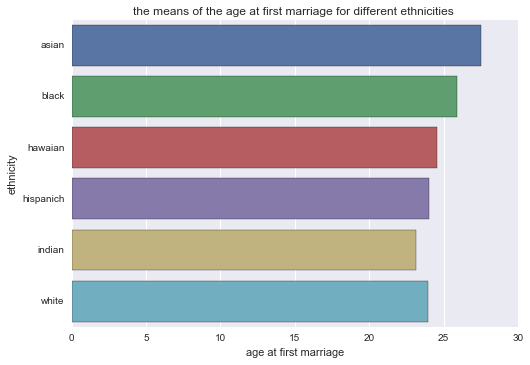

In [34]:
seaborn.barplot(x=means.age_1st_mar,y=means.index)
plt.title("the means of the age at first marriage for different ethnicities ")
plt.xlabel("age at first marriage")
plt.ylabel("ethnicity")

In [37]:

mc1 = multi.MultiComparison(sub1['age_1st_mar'], sub1['ETHNICITY'])
res1 = mc1.tukeyhsd()
print(res1.summary())


 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  asian     black    -1.606  -2.7593 -0.4527  True 
  asian    hawaian  -2.9476  -6.5035  0.6084 False 
  asian   hispanich -3.5078  -4.6499 -2.3656  True 
  asian     indian  -4.3763  -6.0146 -2.7381  True 
  asian     white   -3.5368  -4.6265 -2.4471  True 
  black    hawaian  -1.3416  -4.7624  2.0792 False 
  black   hispanich -1.9018  -2.5033 -1.3003  True 
  black     indian  -2.7704  -4.0899 -1.4508  True 
  black     white   -1.9308  -2.4256 -1.4361  True 
 hawaian  hispanich -0.5602  -3.9772  2.8568 False 
 hawaian    indian  -1.4288   -5.042  2.1845 False 
 hawaian    white   -0.5892  -3.9891  2.8106 False 
hispanich   indian  -0.8686  -2.1783  0.4412 False 
hispanich   white    -0.029  -0.4972  0.4391 False 
  indian    white    0.8395  -0.4248  2.1038 False 
---------------------------------------------------


### reject the null hypothesis and accept the alternative for 
#####                                    asian    ___    black 
#####                                    asian    ___    hispanich 
#####                                    asian    ___    indian 
#####                                    asian    ___    white 
#####                                    black    ___    hispanich
#####                                    black    ___   indian 
#####                                    black    ___    white  

### accept the null hypothesis for

   
#####                                    asian     ___       hawaian     
#####                                    black     ___       hawaian    
#####                                    hawaian ___       hispanich  
#####                                    hawaian ___       indian     
#####                                    hawaian ___      white      
#####                                    hispanich ___  indian     
#####                                    hispanich___   white      
#####                                    indian     ___    white  



    